In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [7]:
matplotlib.__version__


'3.7.0'

In [8]:
%matplotlib inline

In [9]:
path = r'C:\Users\brian\Downloads\Section 6 Cacao Project\02 Data\Prepared Data'

In [10]:
df = pd.read_csv(os.path.join(path, 'Flavors of Cacao clean.csv'))

In [11]:
df.shape

(884, 8)

In [12]:
df.columns

Index(['Maker', 'Bean_Origin/Bar_Name', 'Review_Year', 'Cocoa_Pct',
       'Maker_Location', 'Rating', 'Bean_Type', 'Bean_Origin'],
      dtype='object')

In [13]:
df.rename(columns = {'Company_Name' : 'Maker', 'Company_Location' : 'Maker_Location', 'Bean Origin_Bar Name' : 'Bar_Name/Origin'},  inplace = True)

In [14]:
df.dtypes

Maker                    object
Bean_Origin/Bar_Name     object
Review_Year               int64
Cocoa_Pct               float64
Maker_Location           object
Rating                  float64
Bean_Type                object
Bean_Origin              object
dtype: object

In [15]:
df.head()

,Maker,Bean_Origin/Bar_Name,Review_Year,Cocoa_Pct,Maker_Location,Rating,Bean_Type,Bean_Origin
0,Amedei,Nine,2007,0.75,Italy,4.0,Blend,Argentina
1,Amedei,Toscano Black,2007,0.63,Italy,3.5,Blend,Argentina
2,Amedei,Toscano Black,2006,0.70,Italy,5.0,Blend,Argentina
3,Amedei,Toscano Black,2006,0.66,Italy,4.0,Blend,Argentina
4,Bahen & Co.,Houseblend,2012,0.70,Australia,2.5,Blend,Argentina


In [16]:
df.isnull().sum() # No missing values!

Maker                   0
Bean_Origin/Bar_Name    0
Review_Year             0
Cocoa_Pct               0
Maker_Location          0
Rating                  0
Bean_Type               0
Bean_Origin             0
dtype: int64

In [17]:
df_dups = df[df.duplicated()]

In [18]:
df_dups.shape # No duplicates!

(0, 8)

In [19]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
        
# No mixed-type columns either!

In [20]:
df.corr()

C:\Users\brian\AppData\Local\Temp\ipykernel_25844\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Review_Year,Cocoa_Pct,Rating
Review_Year,1.000000,0.054162,0.046813
Cocoa_Pct,0.054162,1.000000,-0.198257
Rating,0.046813,-0.198257,1.000000


C:\Users\brian\AppData\Local\Temp\ipykernel_25844\2438265331.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


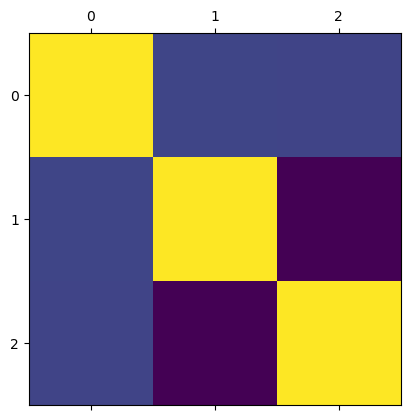

In [21]:
plt.matshow(df.corr())
plt.show()

In [22]:

df.columns

Index(['Maker', 'Bean_Origin/Bar_Name', 'Review_Year', 'Cocoa_Pct',
       'Maker_Location', 'Rating', 'Bean_Type', 'Bean_Origin'],
      dtype='object')

In [23]:
# Create a subset

sub = df[['Review_Year', 'Cocoa_Pct', 'Rating']]

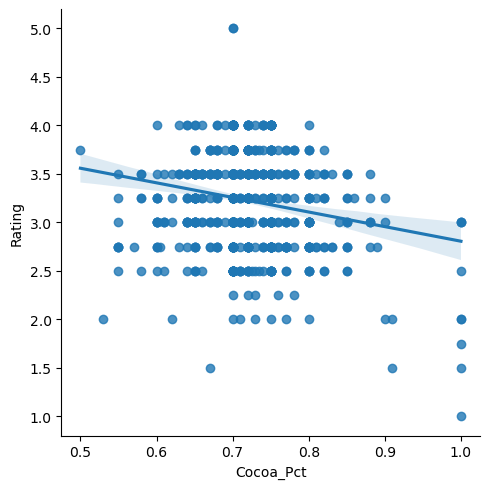

In [24]:
sns.lmplot(x = 'Cocoa_Pct', y = 'Rating', data = df)

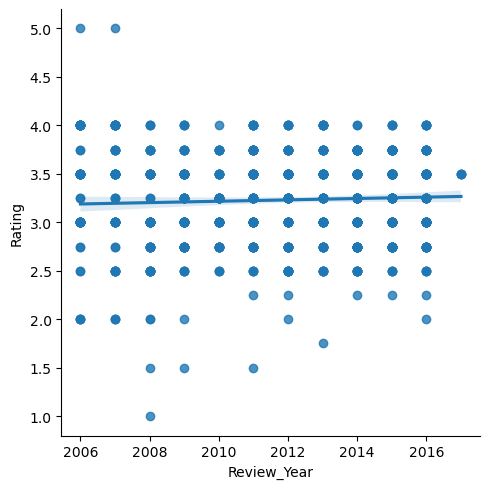

In [26]:
sns.lmplot(x = 'Review_Year', y = 'Rating', data = df)

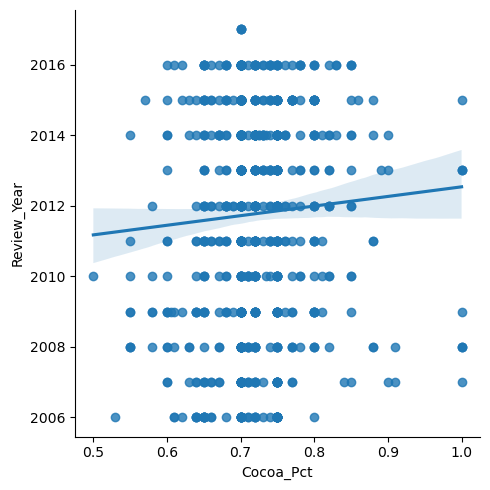

In [28]:
sns.lmplot(x = 'Cocoa_Pct', y = 'Review_Year', data = df)

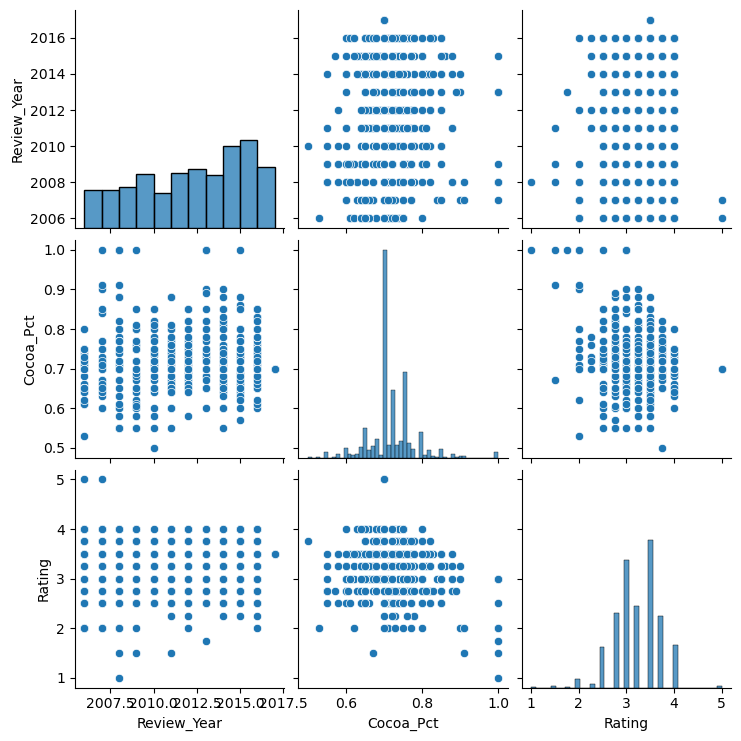

In [29]:
g = sns.pairplot(sub)

<Axes: xlabel='Rating', ylabel='Count'>

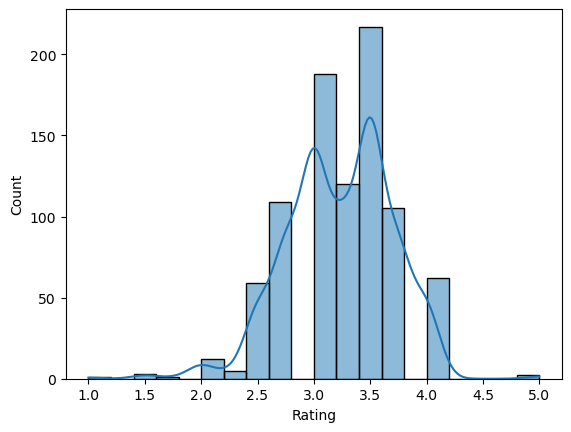

In [31]:
sns.histplot(df['Rating'], bins = 20, kde = True)

In [32]:
df.loc[df['Rating'] < 10.0, 'Rating category'] = 'Very Good'


In [33]:
df.loc[df['Rating'] < 4.0, 'Rating category'] = 'Good'


In [34]:
df.loc[df['Rating'] < 3.0, 'Rating category'] = 'Fair'


In [35]:
df.loc[df['Rating'] < 2.0, 'Rating category'] = 'Poor'


In [36]:
df['Rating category'].value_counts(dropna = False)

Good         630
Fair         185
Very Good     64
Poor           5
Name: Rating category, dtype: int64

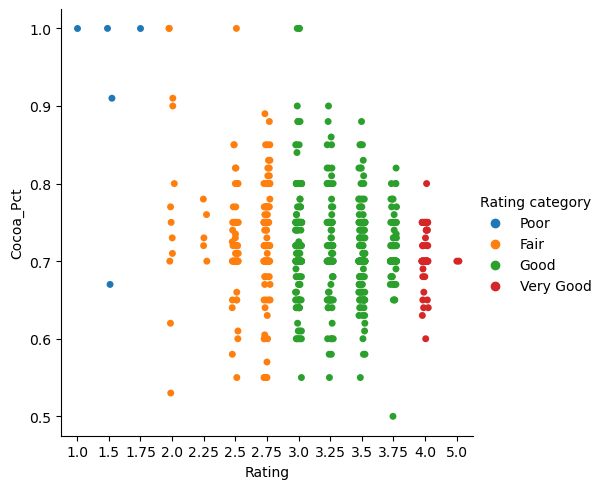

In [37]:
g = sns.catplot(x="Rating", y="Cocoa_Pct", hue="Rating category", data=df)


In [38]:
# fig = g.get_figure()
g.savefig("out.png") 

In [ ]:
#Hypothesis, If a chocolate bar has a high concentration of cocoa, then it will have a high rating score 

<Axes: xlabel='Cocoa_Pct', ylabel='Count'>

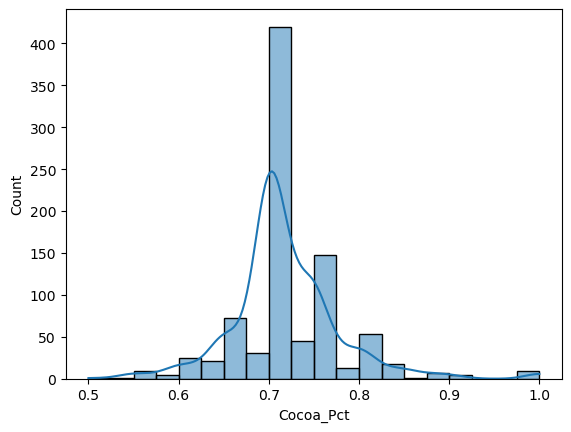

In [39]:
sns.histplot(df['Cocoa_Pct'], bins = 20, kde = True)